In [1]:
cd(@__DIR__)
include(raw"utils\utils.jl")

Undrift!

Making a calendar of 100 years

In [2]:
try 
    using Dates
catch ; 
    import Pkg
    Pkg.add("Dates")
    using Dates
end
k=100
DatesRange=collect(Date(1900):Day(1):Date(1900+k))
N=length(DatesRange)

36525

# AR model on the whole series

## AR(1)

In [3]:
x0=-3.
Φ,σ=0.6,6

(0.6, 6)

In [4]:
include("utils/Simulation.jl")
x=[x0 ; simulation(x0,Φ,σ,N-length(x0))]

36525-element Vector{Float64}:
  -3.0
  -7.718662574986718
   0.07584956699725787
   4.438293124079093
   7.362898524812243
 -11.380485699022984
  -4.05986556443159
   0.5742056411886387
  -0.39205607251327346
  -5.9972952516746965
   ⋮
  13.432455948725394
   9.412760046530643
   6.5366438202796875
   6.704743529679374
   3.958975537839218
   3.8337898279571463
   9.419381109645332
  17.816368732275123
  14.911889193277565

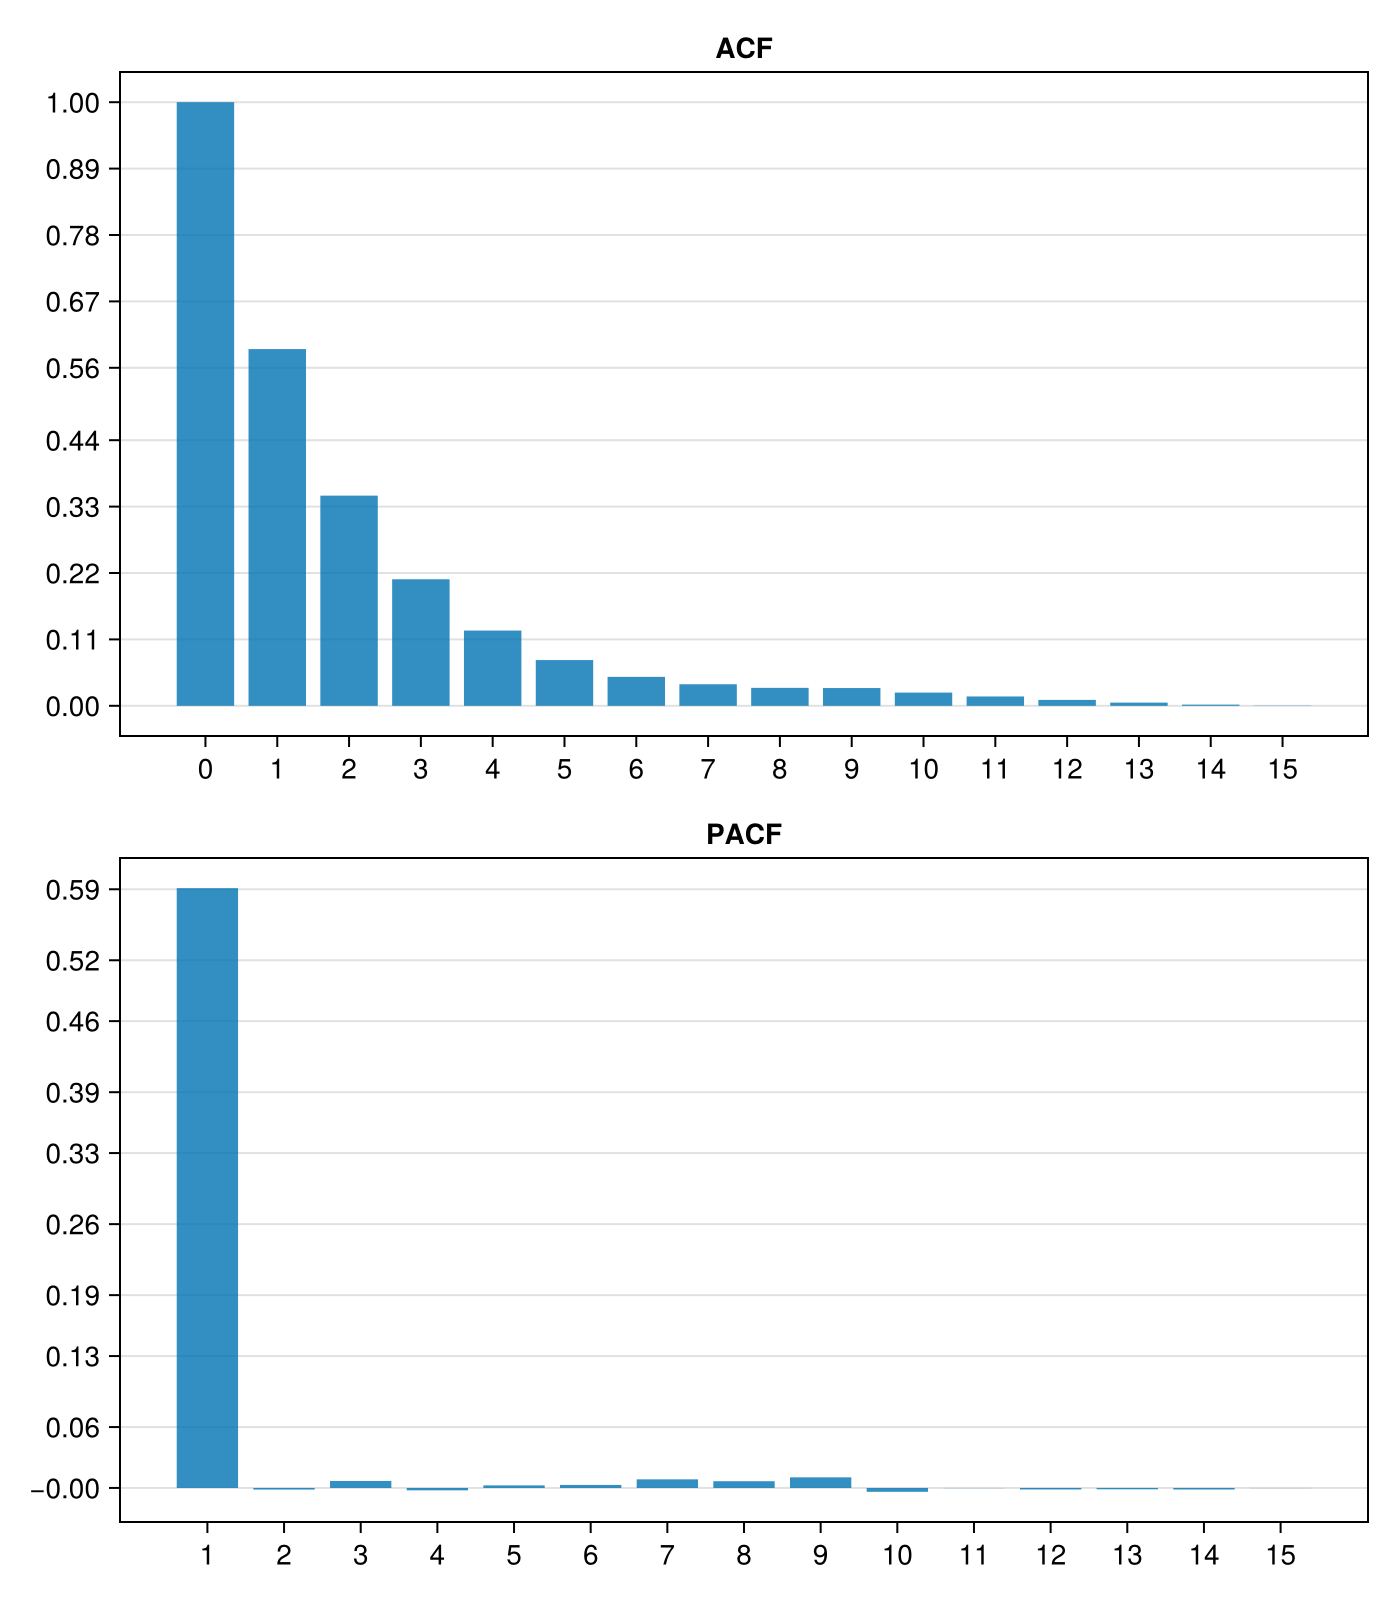

In [5]:
include("utils/ACF_PACF.jl")
ACF_PACF(x)

In [6]:
include("utils/Estimation.jl")
Parameters_est=LL_AR_Estimation(x,1)
Φ_hat,  σ_hat=Parameters_est[1][1], Parameters_est[2]
table = DataFrame("Parameters"=>"Φ", "Error"=>abs(Φ_hat-Φ), "Percentage error"=>100*abs(Φ_hat-Φ)/abs(Φ))
push!(table,("σ",abs(σ_hat-σ),100*abs(σ_hat-σ)/abs(σ)))

Row,Parameters,Error,Percentage error
,String,Float64,Float64
1,Φ,0.00884079,1.47346
2,σ,0.0111904,0.186507


# AR model on each month

Parameters for each month

In [7]:
Φ_month=[5,-7,2,7,-2,7,-5,6,3,1,4,-2] / 10
σ_month=[1.5,2,4.5,7,8,3,4.5,1,7,2.5,3,6]

12-element Vector{Float64}:
 1.5
 2.0
 4.5
 7.0
 8.0
 3.0
 4.5
 1.0
 7.0
 2.5
 3.0
 6.0

Generation of the series associated

In [8]:
n_month=200
x=SimulateMonth(4.,Date(2000,11,1),Φ_month,σ_month,n_month)
Date_vec=collect(Date(2000,11,1):(Date(2000,11,1) + Month(n_month) - Day(1)))
Monthly_temp=MonthlySeparateX(x,Date_vec)

12-element Vector{Vector{AbstractVector}}:
 [[0.6408584452750383, -2.5620403956207136, 0.06729429652344399, -1.8261644409525355, 0.6065258234252823, 0.9192615555995682, -2.002224886922898, -0.9151415874564374, 0.11055200087095712, 0.9043939817344512  …  -4.289448647100389, -3.2670282143327274, -0.683585876667306, 0.10584623585104869, -0.48997276209338475, 0.27692929586624504, 2.018534471685238, 3.268014258326903, 0.7523589344441726, -1.856149059629372], [-1.5016502907326459, -1.8665669388707489, -2.0631326048022665, -0.120605721387531, -0.3565332694420602, -0.46723083444033786, 1.4100668217536145, 1.8223089675149762, -0.6017707046436325, -3.207548174496311  …  -0.0720982052133039, -2.6437353492711604, -4.081593092532685, -0.5826697264610317, -0.8090819349195465, 0.3249220641700649, 1.3886037274132579, -1.49015550313908, -0.9750790947855253, -0.15542532696279426], [-2.620338061372856, -0.2377214366769227, -1.7140165041446973, -1.814036909579618, -0.5142848034492913, 0.13361164731833453,

## Autocorrelations

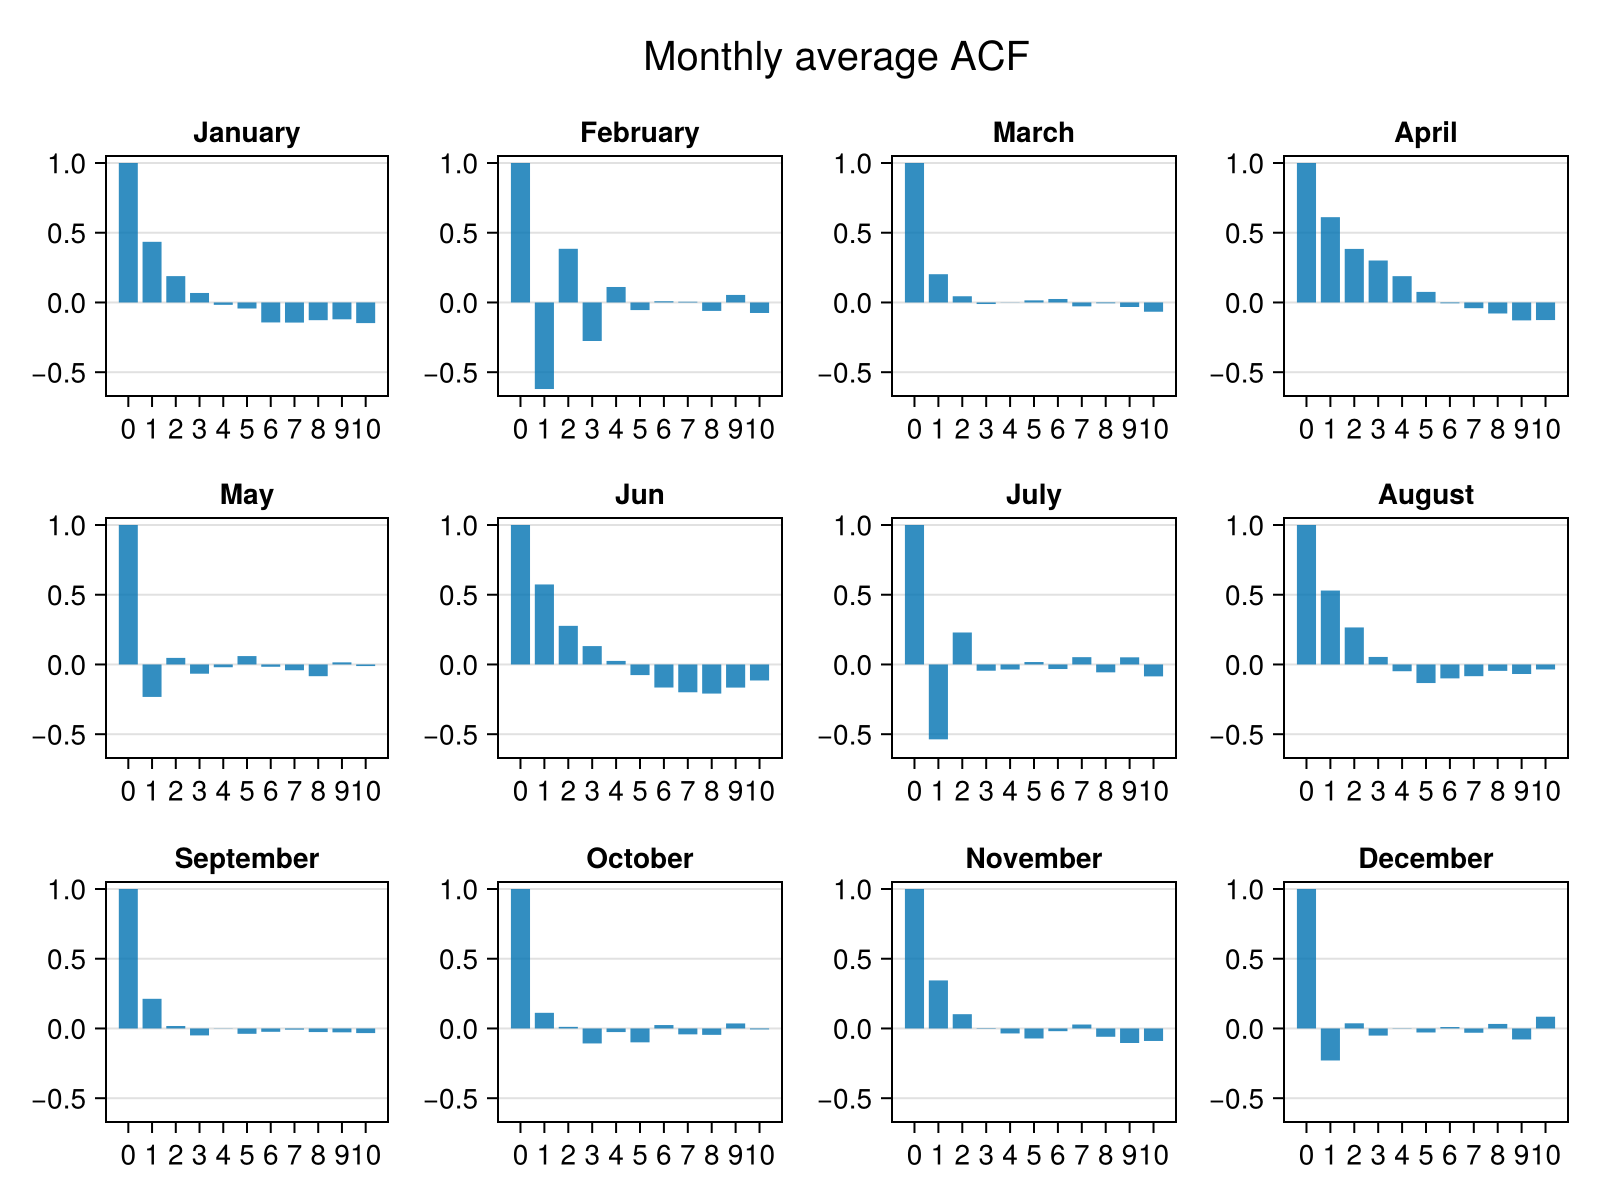

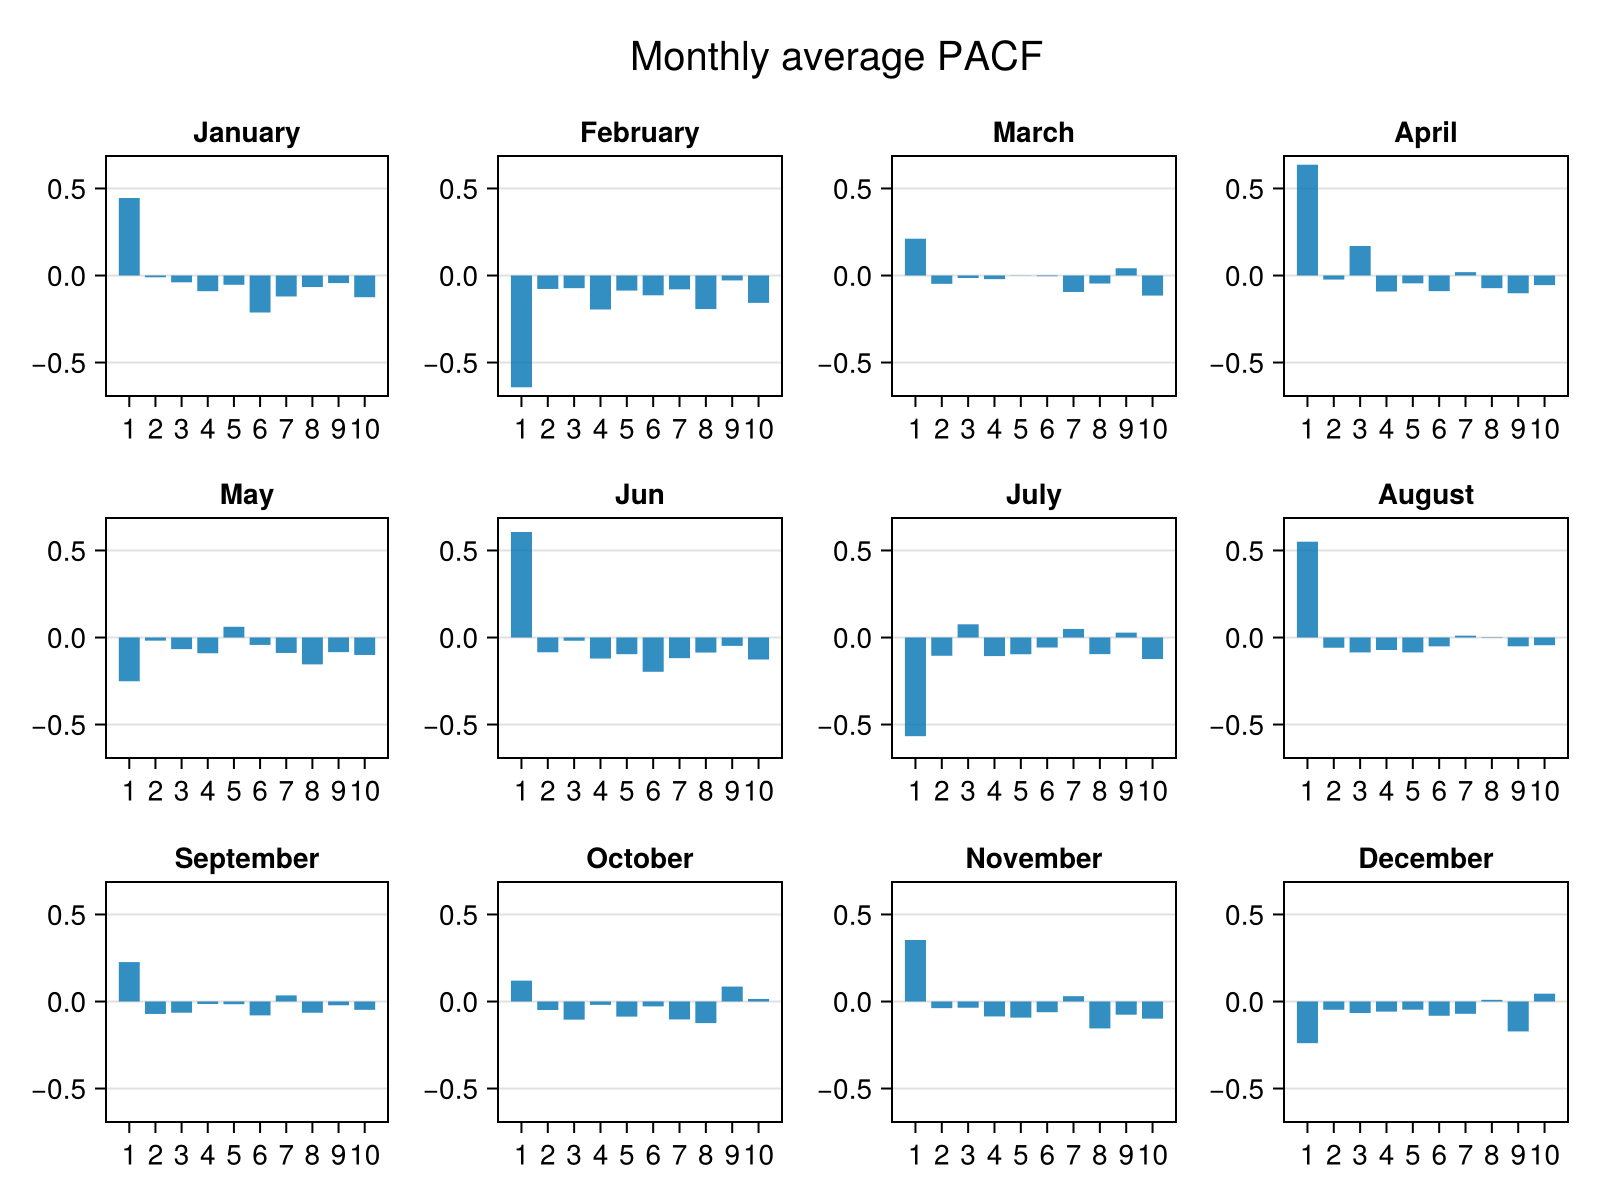

CairoMakie.Screen{IMAGE}


In [9]:
display(MonthlyACF(Monthly_temp))
display(MonthlyPACF(Monthly_temp))

## Estimating models

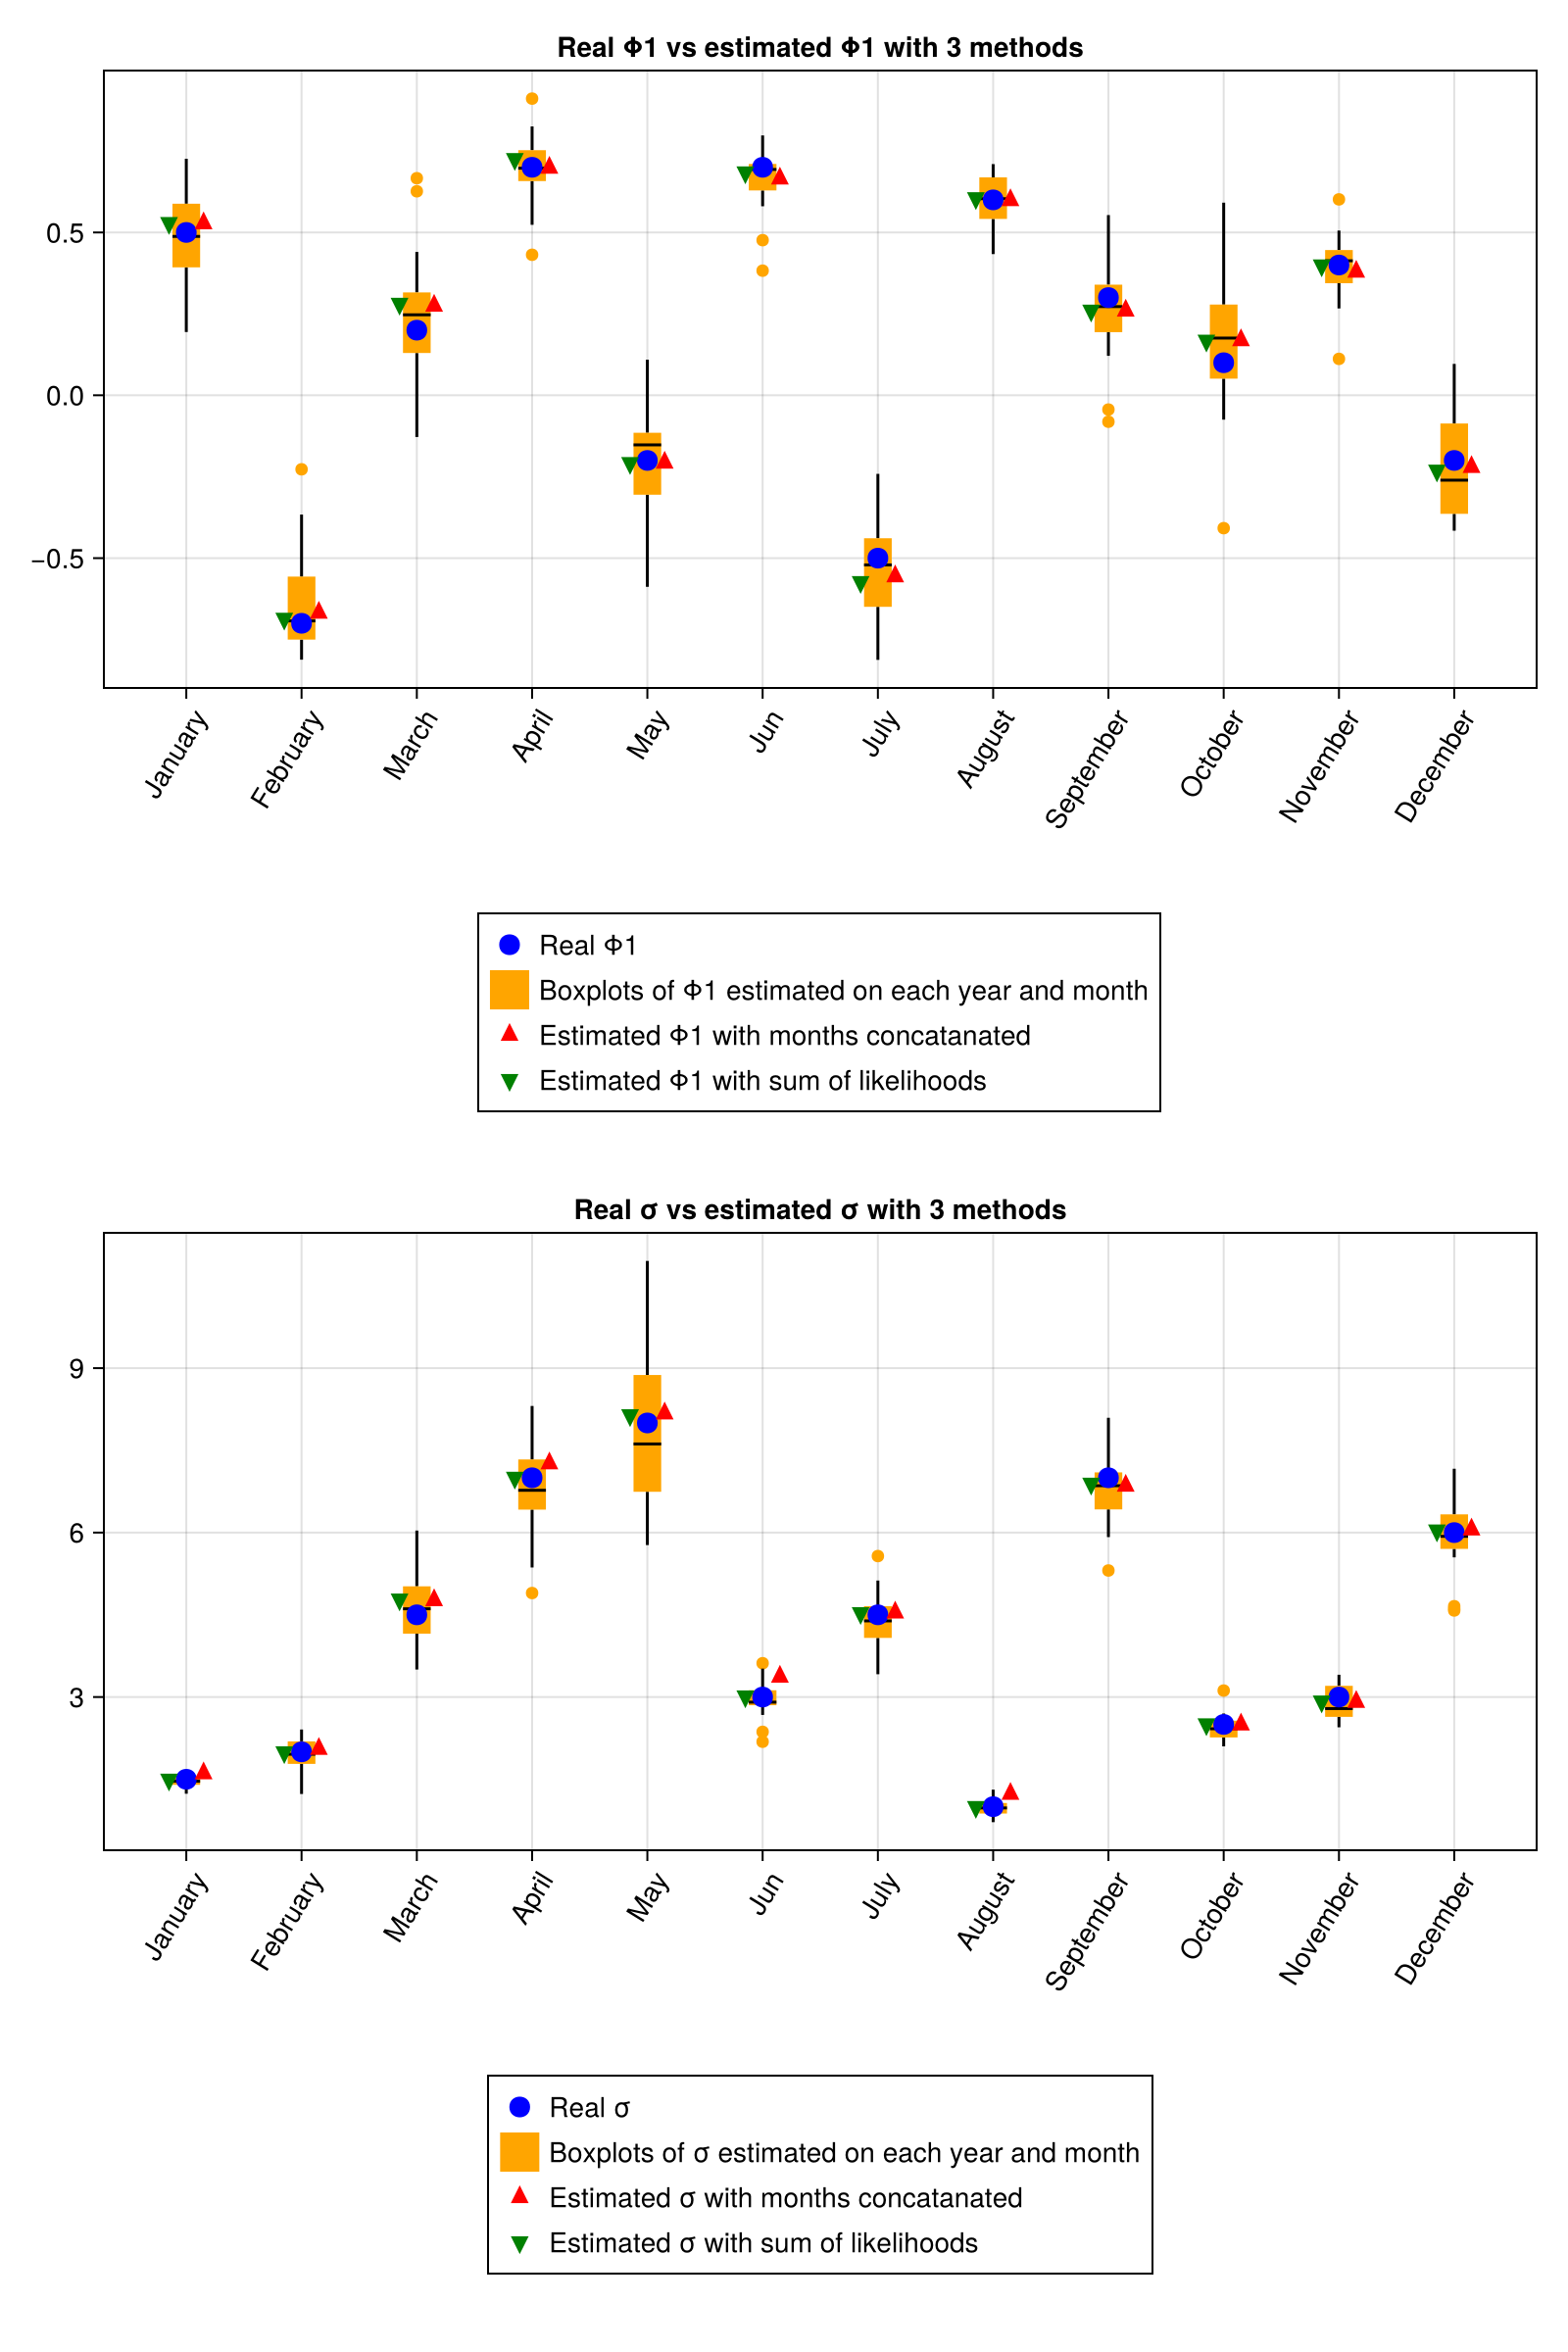

Row,Parameter,Month concatanation,Sum LL,mean of monthly parameters,median of monthly parameters
,String,Float64,Float64,Float64,Float64
1,Φ1,13.7696,14.2262,11.7528,14.6234
2,σ,5.37155,1.28062,2.33696,3.01586


6

In [10]:
include(raw"utils\Estimation.jl")
Parameters,autofig,PercentageErrorTable=AllEstimation(x,1,Date_vec=Date_vec,TrueParamVec=[Φ_month,σ_month])
display(autofig)
display(PercentageErrorTable)

In [11]:
Φ_vec, σ_vec = AutoTakeParameters((Parameters,PercentageErrorTable))
n_years=100
sim=SimulateYears([4.],Date(2001,1,1),Φ_vec, σ_vec,n_years)
sample_=invert(sim)

365-element Vector{Vector{Float64}}:
 [4.0, -3.286329964424339, -0.07023482968509892, 0.3071824548018913, 4.018492365296812, -3.6213461798520665, -3.4157760612242076, -1.0361034530489956, -1.5368974165620912, 1.5871838335053141  …  0.3845886956810265, -1.8952525294870382, -1.548559249519745, 0.8614183904556757, 1.740605645115037, -1.1172051362389472, -0.15990447560981458, -1.6157948283404475, -1.8807967451325034, -2.9082412245358555]
 [3.579439679540137, 3.2987867466874086, 1.488497801464104, -0.7218650163711443, 1.1811412653075424, -2.6601628510695083, -2.392980023730745, -0.6847712047578032, 0.28920033829534153, -1.453422476993105  …  -0.26817047926631127, -1.3740716418072063, 0.10260392273853114, 0.7081010972412407, 2.295123273283902, -0.35952120170174096, -1.8377462909572457, -2.5200199064669335, -0.8160706121651613, -1.7630340076924584]
 [1.8081762191221389, 2.8000521254204855, 1.9988392524896805, 0.6162243268234766, -0.525470726184177, -0.6391657168836291, -0.0854163299825399, -2

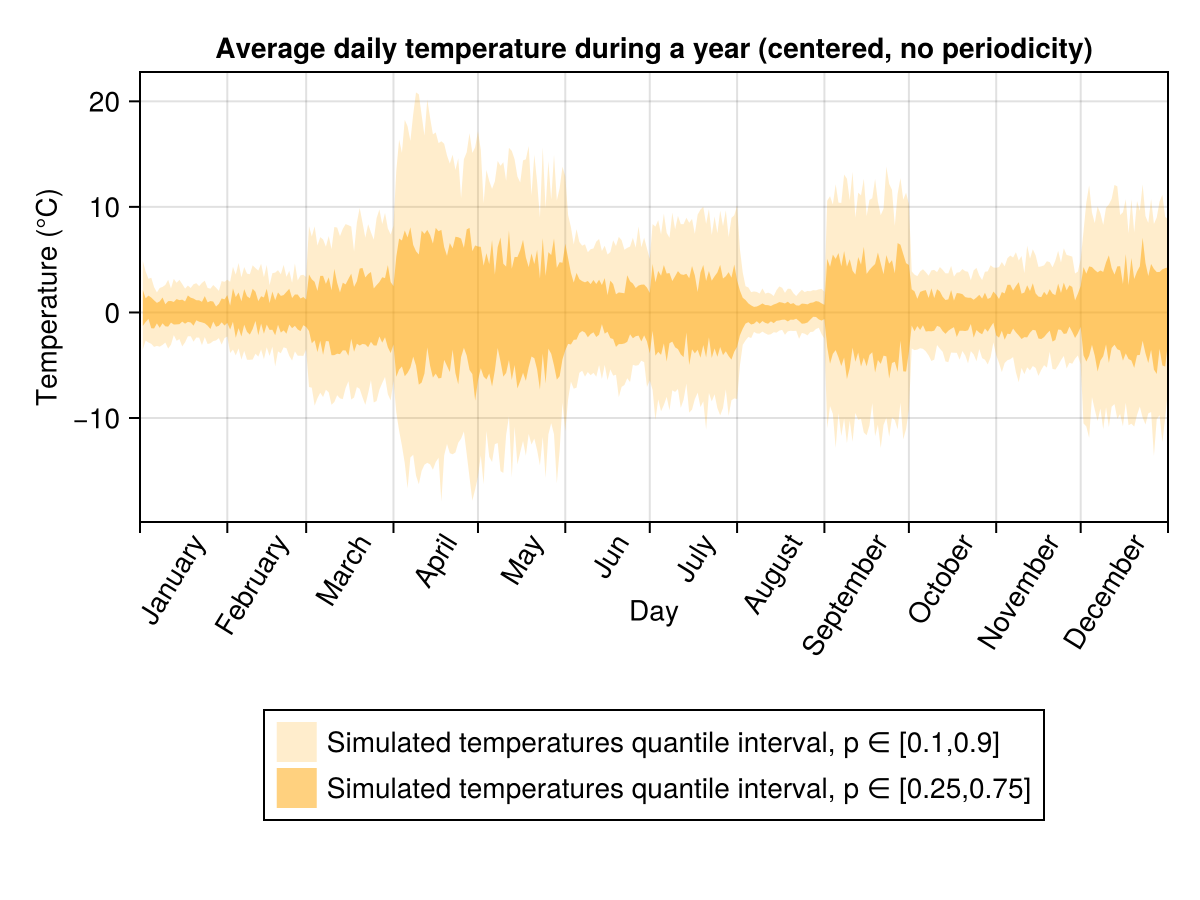

In [12]:
include("utils/Plotting.jl")
PlotYearCurves([],
["Simulated temperatures quantile interval, p ∈ [0.1,0.9]","Simulated temperatures quantile interval, p ∈ [0.25,0.75]"],
"Average daily temperature during a year (centered, no periodicity)",
[(quantile.(sample_,0.05),quantile.(sample_,0.95)),(quantile.(sample_,0.25),quantile.(sample_,0.75))],
[("orange",0.2),("orange",0.5)]
)